In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
!pip install git+https://github.com/fastai/fastai@2e1ccb58121dc648751e2109fc0fbf6925aa8887

  Cloning https://github.com/fastai/fastai (to revision 2e1ccb58121dc648751e2109fc0fbf6925aa8887) to /tmp/pip-req-build-dzos2bf1
  Running command git clone -q https://github.com/fastai/fastai /tmp/pip-req-build-dzos2bf1
  Running command git checkout -q 2e1ccb58121dc648751e2109fc0fbf6925aa8887
     |████████████████████████████████| 496.4MB 84kB/s 
  Stored in directory: /tmp/pip-ephem-wheel-cache-0k1uoev1/wheels/25/e9/9b/223e47f59c39f0bd393733db0f7efe8ec6f078d29c32198f9f
Successfully built fastai
ERROR: allennlp 0.8.4 requires awscli>=1.11.91, which is not installed.
ERROR: allennlp 0.8.4 requires flaky, which is not installed.
ERROR: allennlp 0.8.4 requires responses>=0.7, which is not installed.
ERROR: torchvision 0.3.0 has requirement torch>=1.1.0, but you'll have torch 0.3.1 which is incompatible.
ERROR: pytorch-pretrained-bert 0.6.2 has requirement torch>=0.4.1, but you'll have torch 0.3.1 which is incompatible.
ERROR: allennlp 0.8.4 has requirement torch>=0.4.1, but you'll have

In [3]:
!apt update && apt install -y libsm6 libxext6

Ign:1 http://deb.debian.org/debian stretch InRelease
Get:2 http://security.debian.org/debian-security stretch/updates InRelease [94.3 kB]
Get:3 http://deb.debian.org/debian stretch-updates InRelease [91.0 kB]
Err:2 http://security.debian.org/debian-security stretch/updates InRelease
  Couldn't create temporary file /tmp/apt.conf.uDuhd0 for passing config to apt-key
Err:3 http://deb.debian.org/debian stretch-updates InRelease
  Couldn't create temporary file /tmp/apt.conf.EKbQ3Z for passing config to apt-key
Hit:4 http://deb.debian.org/debian stretch Release
Err:5 http://deb.debian.org/debian stretch Release.gpg
  Couldn't create temporary file /tmp/apt.conf.LvlDPY for passing config to apt-key
Ign:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1604/x86_64  InRelease
Ign:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1604/x86_64  InRelease
Hit:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1604/x86_64  Release
Err:9 https

In [4]:
from fastai import *
from fastai.imports import *
from fastai.structured import *

from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from IPython.display import display

from sklearn import metrics

In [5]:
PATH = '../input/train/'

In [6]:
!ls {PATH}

Train.csv


In [7]:
df_raw = pd.read_csv(f'{PATH}Train.csv', low_memory=False,
                    parse_dates=['saledate'])

In [8]:
def display_all(df):
    with pd.option_context("display.max_rows",1000
                           , "display.max_columns",1000):
        display(df)

In [9]:
display_all(df_raw.tail().T)

,401120,401121,401122,401123,401124
SalesID,6333336,6333337,6333338,6333341,6333342
SalePrice,10500,11000,11500,9000,7750
MachineID,1840702,1830472,1887659,1903570,1926965
ModelID,21439,21439,21439,21435,21435
datasource,149,149,149,149,149
auctioneerID,1,1,1,2,2
YearMade,2005,2005,2005,2005,2005
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,2011-11-02 00:00:00,2011-11-02 00:00:00,2011-11-02 00:00:00,2011-10-25 00:00:00,2011-10-25 00:00:00


In [10]:
df_raw.SalePrice = np.log(df_raw.SalePrice)

In [11]:
display_all(df_raw.describe(include='all').T)

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
SalesID,401125,NaN,NaN,NaN,NaN,NaN,1.91971e+06,909021,1.13925e+06,1.41837e+06,1.63942e+06,2.24271e+06,6.33334e+06
SalePrice,401125,NaN,NaN,NaN,NaN,NaN,10.1031,0.693621,8.4659,9.5819,10.0858,10.5966,11.8636
MachineID,401125,NaN,NaN,NaN,NaN,NaN,1.2179e+06,440992,0,1.0887e+06,1.27949e+06,1.46807e+06,2.48633e+06
ModelID,401125,NaN,NaN,NaN,NaN,NaN,6889.7,6221.78,28,3259,4604,8724,37198
datasource,401125,NaN,NaN,NaN,NaN,NaN,134.666,8.96224,121,132,132,136,172
auctioneerID,380989,NaN,NaN,NaN,NaN,NaN,6.55604,16.9768,0,1,2,4,99
YearMade,401125,NaN,NaN,NaN,NaN,NaN,1899.16,291.797,1000,1985,1995,2000,2013
MachineHoursCurrentMeter,142765,NaN,NaN,NaN,NaN,NaN,3457.96,27590.3,0,0,0,3025,2.4833e+06
UsageBand,69639,3,Medium,33985,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
saledate,401125,3919,2009-02-16 00:00:00,1932,1989-01-17 00:00:00,2011-12-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
add_datepart(df_raw, 'saledate')
df_raw.saleYear.head()

0    2006
1    2004
2    2004
3    2011
4    2009
Name: saleYear, dtype: int64

In [13]:
train_cats(df_raw)

In [14]:
df_raw.UsageBand.cat.codes

0         1
1         1
2         0
3         0
4         2
5         1
6         0
7         0
8         1
9         2
10        2
11        1
12       -1
13        2
14        1
15        2
16        1
17       -1
18        1
19        2
20        2
21        2
22        1
23        0
24        2
25        2
26        1
27       -1
28        1
29        2
         ..
401095   -1
401096   -1
401097   -1
401098   -1
401099   -1
401100   -1
401101   -1
401102   -1
401103   -1
401104   -1
401105   -1
401106   -1
401107   -1
401108   -1
401109   -1
401110   -1
401111   -1
401112   -1
401113   -1
401114   -1
401115   -1
401116   -1
401117   -1
401118   -1
401119   -1
401120   -1
401121   -1
401122   -1
401123   -1
401124   -1
Length: 401125, dtype: int8

In [15]:
df_raw.UsageBand.cat.set_categories(['High','Medium','Low']
                                    , ordered=True, inplace=True)

In [16]:
display_all(df_raw.isnull().sum().sort_index()/len(df_raw))

Backhoe_Mounting            0.803872
Blade_Extension             0.937129
Blade_Type                  0.800977
Blade_Width                 0.937129
Coupler                     0.466620
Coupler_System              0.891660
Differential_Type           0.826959
Drive_System                0.739829
Enclosure                   0.000810
Enclosure_Type              0.937129
Engine_Horsepower           0.937129
Forks                       0.521154
Grouser_Tracks              0.891899
Grouser_Type                0.752813
Hydraulics                  0.200823
Hydraulics_Flow             0.891899
MachineHoursCurrentMeter    0.644089
MachineID                   0.000000
ModelID                     0.000000
Pad_Type                    0.802720
Pattern_Changer             0.752651
ProductGroup                0.000000
ProductGroupDesc            0.000000
ProductSize                 0.525460
Pushblock                   0.937129
Ride_Control                0.629527
Ripper                      0.740388
S

In [17]:
os.makedirs('tmp',exist_ok=True)
df_raw.to_feather('tmp/bulldozers-raw')

In [18]:
df_raw = pd.read_feather('tmp/bulldozers-raw')

/opt/conda/lib/python3.6/site-packages/pandas/io/feather_format.py:112: FutureWarning: `nthreads` argument is deprecated, pass `use_threads` instead
  return feather.read_dataframe(path, nthreads=nthreads)


In [19]:
df, y, nas = proc_df(df_raw, 'SalePrice')

In [20]:
m = RandomForestRegressor(n_jobs=-1)
m.fit(df, y)
m.score(df,y)

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.983060522408049

In [21]:
def split_vals(a,n): return a[:n].copy(),a[n:].copy()

n_valid = 12000
n_trn = len(df)-n_valid
raw_train, raw_valid = split_vals(df_raw,n_trn)
X_train, X_valid = split_vals(df, n_trn)
y_train, y_valid = split_vals(y, n_trn)

X_train.shape, y_train.shape, X_valid.shape


((389125, 66), (389125,), (12000, 66))

In [22]:
def rmse(x,y): return math.sqrt(((x-y)**2).mean())

def print_score(m):
    res = [rmse(m.predict(X_train), y_train), 
           rmse(m.predict(X_valid), y_valid), m.score(X_train, y_train),
          m.score(X_valid, y_valid)]
    
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
        
    print(res)

In [23]:
m = RandomForestRegressor(n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


CPU times: user 1min 18s, sys: 568 ms, total: 1min 18s
Wall time: 40.6 s
[0.09063150609679779, 0.24788321672397268, 0.9828330469165152, 0.8902657447505754]


In [24]:
df_trn, y_trn, nas = proc_df(df_raw, 'SalePrice', subset=30000, na_dict=nas)
X_train, _ = split_vals(df_trn, 20000)
y_train, _ = split_vals(y_trn, 20000)

In [25]:
m = RandomForestRegressor(n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


CPU times: user 3.21 s, sys: 16 ms, total: 3.22 s
Wall time: 1.66 s
[0.11306335325210128, 0.3451622755343417, 0.9721501620104042, 0.7872377272061877]


In [26]:
m = RandomForestRegressor(n_estimators=1, max_depth=3, bootstrap = False, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[0.5255804682407856, 0.5816773434511521, 0.39819279256237483, 0.395756106129895]


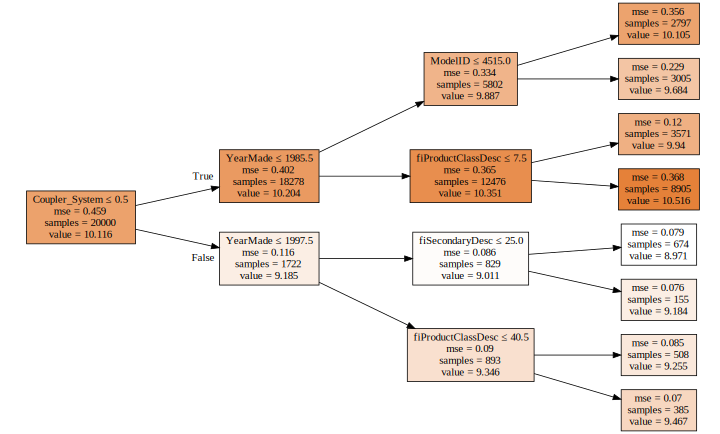

In [27]:
draw_tree(m.estimators_[0], df_trn, precision=3)

In [28]:
m = RandomForestRegressor(n_estimators=1, bootstrap=False, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[5.756054031998178e-17, 0.4947914491621052, 1.0, 0.5627877262016147]


In [29]:
m =RandomForestRegressor(n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.11135431375081914, 0.36141719913564385, 0.9729857421206456, 0.7667263923769846]


In [30]:
preds = np.stack([t.predict(X_valid) for t in m.estimators_])
preds[:,0], np.mean(preds[:,0]), y_valid[0]

(array([9.21034, 9.04782, 9.30565, 9.04782, 9.39266, 9.10498, 9.39266, 9.04782, 9.51044, 9.07681]),
 9.213701290882872,
 9.104979856318357)

In [31]:
preds.shape

(10, 12000)

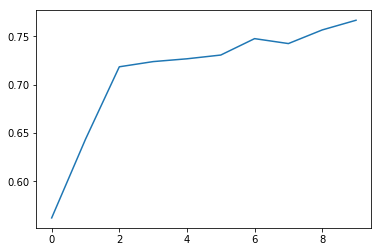

In [32]:
plt.plot([metrics.r2_score(y_valid, np.mean(preds[:i+1], axis=0)) for i in range(10)])

In [33]:
m = RandomForestRegressor(n_estimators=20, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[0.10344755530684606, 0.34343068789528414, 0.9766858592893103, 0.7893671163292889]


In [34]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[0.09662430758827796, 0.3333700273672074, 0.9796599629689677, 0.8015271640157456]


In [35]:

m = RandomForestRegressor(n_estimators=80, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[0.09422848637104607, 0.3425702215080452, 0.9806561293444623, 0.7904212764323477]


In [36]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.09673583338623327, 0.32881095136398114, 0.9796129820786147, 0.8069185634368954, 0.8548750619866956]


In [37]:
df_trn, y_trn, nas = proc_df(df_raw, 'SalePrice')
X_train, X_valid = split_vals(df_trn, n_trn)
y_train, y_valid = split_vals(y_trn, n_trn)

In [38]:
set_rf_samples(20000)

In [39]:
m = RandomForestRegressor(n_jobs=-1, oob_score=True)
%time m.fit(X_train, y_train)
print_score(m)

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


CPU times: user 8.3 s, sys: 716 ms, total: 9.02 s
Wall time: 6.17 s
[0.24020769525196853, 0.2736469483528567, 0.8794107320791243, 0.8662698928145072, 0.8668307994349005]


In [40]:
m = RandomForestRegressor(n_jobs=-1, oob_score=True)
%time m.fit(X_train, y_train)
print_score(m)

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


CPU times: user 8.28 s, sys: 708 ms, total: 8.98 s
Wall time: 6.25 s
[0.2414131754539297, 0.27768044244826173, 0.8781973426508993, 0.8622985354506756, 0.8653924511106498]


In [41]:
reset_rf_samples()

In [42]:
m = RandomForestRegressor(n_estimators=10, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:737: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[0.09038106527291292, 0.25335827109545306, 0.9829277902558156, 0.885364759214474, -1.283379411550921]


In [43]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf = 3, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.11499851311202151, 0.23491347674793048, 0.9723611940759956, 0.9014483637986145, 0.9086050356427824]


In [44]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.11909643239945826, 0.2282785602152135, 0.9703563053991398, 0.9069367482125066, 0.911529058261849]
